In [5]:
#main
import pandas as pd
import numpy as np

#plot
import seaborn as sns
from matplotlib import pyplot as plt

#dop
from sklearn.model_selection import train_test_split

#ML

#metric
from sklearn.metrics import r2_score

#test
from collections import Counter

In [6]:
PATH_TO_TRAIN = 'csv/train.csv'
PATH_TO_TASK = 'csv/test.csv'

In [7]:
train = pd.read_csv(PATH_TO_TRAIN, index_col='PassengerId')
task = pd.read_csv(PATH_TO_TASK, index_col='PassengerId')

In [8]:
task.info()
task.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
y_train = train['Survived']

In [10]:
df = pd.concat([train.drop('Survived', axis=1), task])

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Зависимость выживаемости от признаков
---

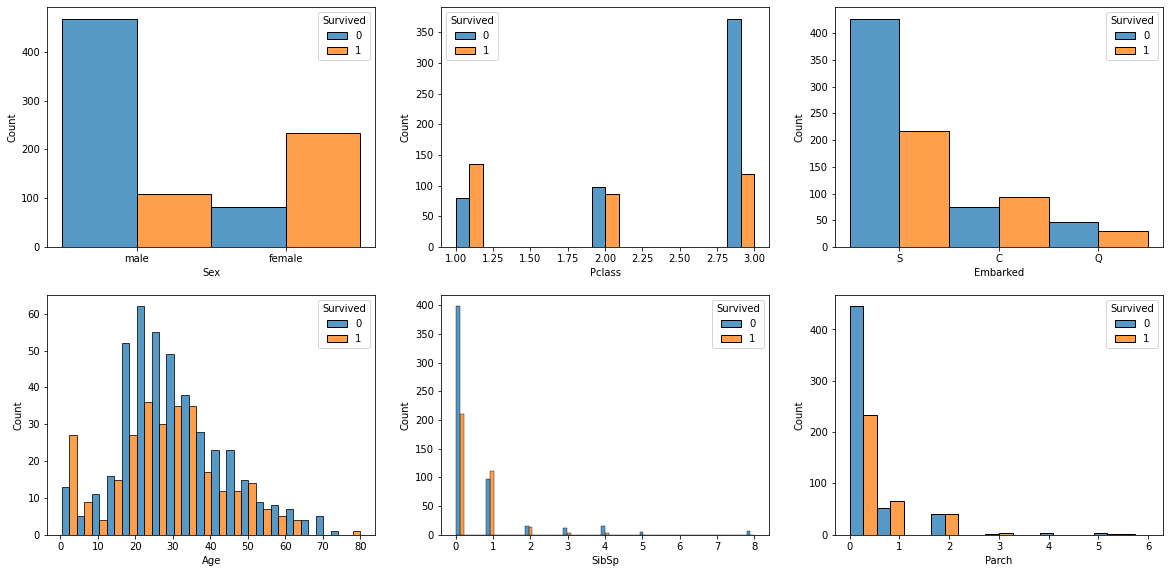

In [12]:
plt.figure(figsize = [20, 15])
plt.subplot(3, 3, 1)
sns.histplot(data = train, x = train['Sex'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 2)
sns.histplot(data = train, x = train['Pclass'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 3)
sns.histplot(data = train, x = train['Embarked'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 4)
sns.histplot(data = train, x = train['Age'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 5)
sns.histplot(data = train, x = train['SibSp'], hue = train['Survived'], multiple = 'dodge')
plt.subplot(3, 3, 6)
sns.histplot(data = train, x = train['Parch'], hue = train['Survived'], multiple = 'dodge')
plt.plot();

способ вытянуть значения из str переменной

In [13]:
df['Title'] = df['Name'].str.extract(' ([A-z]+)\.') 

---

In [14]:
df.replace({'male' :0, 'female' :1}, inplace=True)

In [15]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   int64  
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


Заполнение пропусков признака 'Age'
---
---
Одной медианной по всей выборке нельзя это сильно изменит параметры нормального распределения

In [16]:
index_nan_age = list(df['Age'][df['Age'].isnull()].index)

for i in index_nan_age:
    age_med = np.nanmedian(df['Age'][(df['Sex'] == df.loc[i]['Sex']) & (df["Pclass"] == df.loc[i]['Pclass'])])
    df.loc[i, 'Age'] = age_med

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Title     1309 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 155.0+ KB


In [17]:
test_age = train.copy()

In [28]:
test_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [27]:
for i in list(df[df.index <= test_age.index[-1]].index):
    test_age.loc[i, 'Age'] = df.loc[i, 'Age']

[]

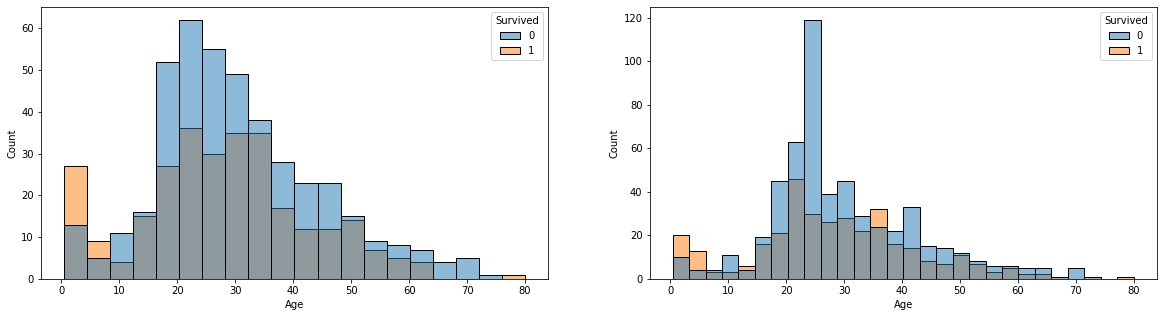

In [40]:
plt.figure(figsize = [20, 5])
plt.title('Сравнение до после заполнение nan')
plt.subplot(1, 2, 2)
sns.histplot(data = test_age, x = test_age['Age'], hue = test_age['Survived'], multiple = 'layer')
plt.subplot(1, 2, 1)
sns.histplot(data = train, x = train['Age'], hue = train['Survived'], multiple = 'layer')
plt.plot()

<AxesSubplot:xlabel='Age_group', ylabel='Count'>

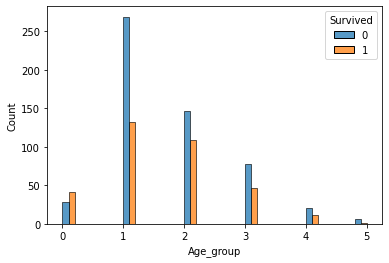

In [48]:
test_age['Age_group'] = test_age['Age'].map(lambda age: int(age // 14))
sns.histplot(data = test_age, x = test_age['Age_group'], hue = test_age['Survived'], multiple = 'dodge')

---

---

In [50]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Name       1309 non-null   object 
 2   Sex        1309 non-null   int64  
 3   Age        1309 non-null   float64
 4   SibSp      1309 non-null   int64  
 5   Parch      1309 non-null   int64  
 6   Ticket     1309 non-null   object 
 7   Fare       1308 non-null   float64
 8   Cabin      295 non-null    object 
 9   Embarked   1307 non-null   object 
 10  Title      1309 non-null   object 
 11  Age_group  1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 165.2+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,2
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [49]:
df['Age_group'] = df['Age'].map(lambda age: int(age // 14))

---


Работа с 'Title'
---

In [53]:
test_age['Title'] = df[df.index <= test_age.index[-1]]['Title']

<AxesSubplot:xlabel='Title', ylabel='Count'>

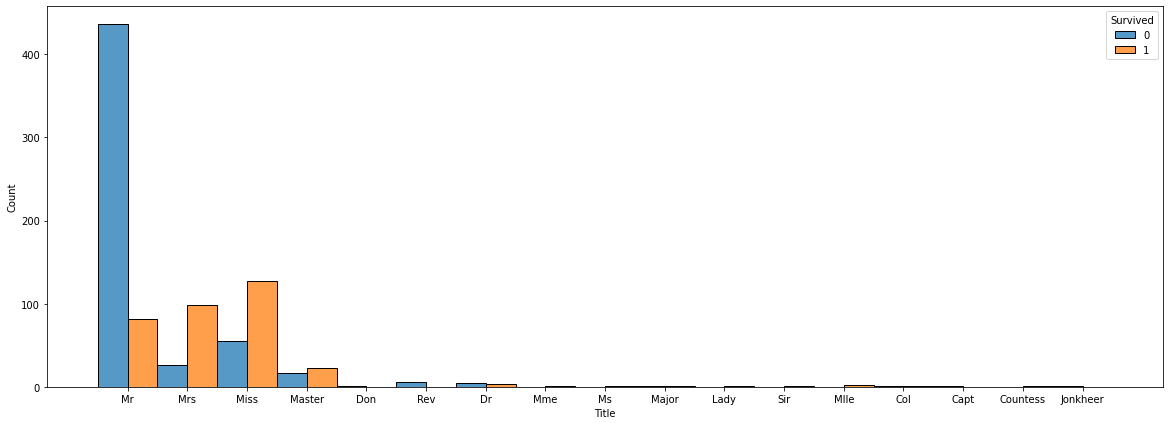

In [57]:
plt.figure(figsize = [20, 7])
sns.histplot(data = test_age, x = test_age['Title'], hue = test_age['Survived'], multiple = 'dodge')

In [59]:
test_age.groupby('Title').mean()['Survived'].sort_values()

Title
Capt        0.000000
Don         0.000000
Jonkheer    0.000000
Rev         0.000000
Mr          0.156673
Dr          0.428571
Col         0.500000
Major       0.500000
Master      0.575000
Miss        0.697802
Mrs         0.792000
Mlle        1.000000
Mme         1.000000
Countess    1.000000
Ms          1.000000
Lady        1.000000
Sir         1.000000
Name: Survived, dtype: float64

In [83]:
df['Title'].replace(['Dr', 'Col', 'Major', 'Rev', 'Jonkheer', 'Don', 'Capt'], 'Mr', inplace=True)
df['Title'].replace(['Sir'], 'Master', inplace=True)
df['Title'].replace(['Lady', 'Ms', 'Countess', 'Mme', 'Mlle', 'Mrs', 'Dona'], 'Miss', inplace=True)

In [84]:
test_age['Title'].replace(['Dr', 'Col', 'Major', 'Rev', 'Jonkheer', 'Don', 'Capt'], 'Mr', inplace=True)
test_age['Title'].replace(['Sir'], 'Master', inplace=True)
test_age['Title'].replace(['Lady', 'Ms', 'Countess', 'Mme', 'Mlle', 'Mrs', 'Dona'], 'Miss', inplace=True)

In [85]:
test_age.groupby('Title').mean()['Survived']

Title
Master    0.585366
Miss      0.741214
Mr        0.160149
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Title', ylabel='Count'>

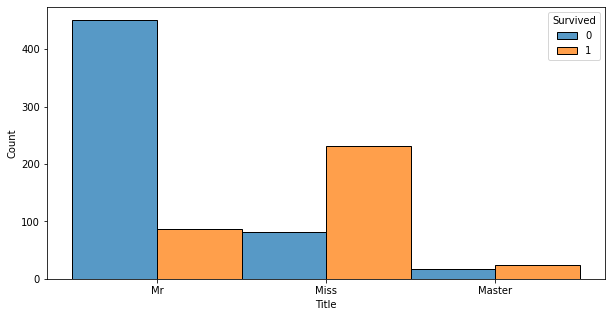

In [86]:
plt.figure(figsize = [10, 5])
sns.histplot(data = test_age, x = test_age['Title'], hue = test_age['Survived'], multiple = 'dodge')

---
Работа с признаком Cabin
---
---

In [109]:
df['Cabin'].str.extract('(\w)').value_counts()

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
dtype: int64

In [110]:
df['Cabin'] = df['Cabin'].str.extract('(\w)')

In [111]:
df.loc[df['Cabin'].isnull(), 'Cabin'] = 'U' # U is unknown

In [112]:
df['Cabin'].value_counts().sort_index()

A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
U    1014
Name: Cabin, dtype: int64

![img](./ddf3070c69e0450184e35790f72917d1.jpeg)

In [114]:
df[df['Cabin'] == 'T']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
PassengerId,,,,,,,,,,,,
340,1,"Blackwell, Mr. Stephen Weart",0,45.0,0,0,113784,35.5,T,S,Mr,3


In [115]:
df.loc[df['Cabin'] == 'T', 'Cabin'] = 'B'

In [126]:
test = df[df.index <= train.index[-1]].copy()
test['Survived'] = train['Survived']

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

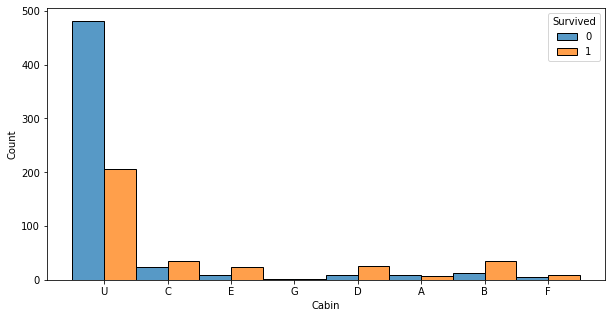

In [145]:
plt.figure(figsize = [10, 5])
sns.histplot(data=test, x=test['Cabin'], hue=test['Survived'], multiple='dodge')

<AxesSubplot:xlabel='Cabin', ylabel='Count'>

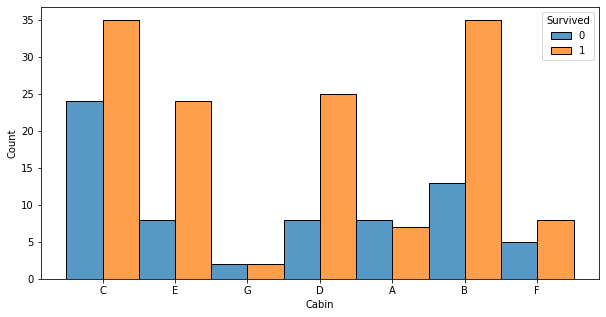

In [146]:
plt.figure(figsize = [10, 5])
sns.histplot(data=test, x=test[test['Cabin'] != 'U']['Cabin'], hue=test['Survived'], multiple='dodge')

ЧТО - ТО не как

In [150]:
df.loc[df['Cabin'] != 'U', 'Cabin'] = 'K' # K is Know
test.loc[test['Cabin'] != 'U', 'Cabin'] = 'K' # K is Know


<AxesSubplot:xlabel='Cabin', ylabel='Count'>

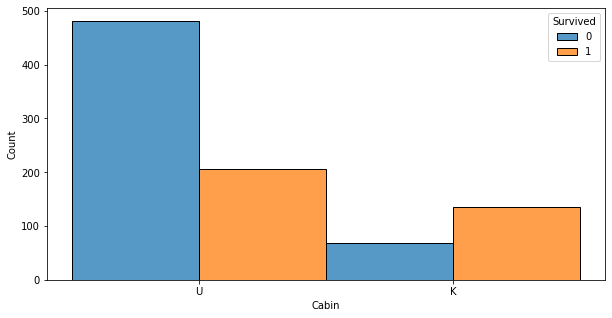

In [151]:
plt.figure(figsize = [10, 5])
sns.histplot(data=test, x=test['Cabin'], hue=test['Survived'], multiple='dodge')

---
Работа с признаками SibSp Parch
---
---

In [153]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     1309 non-null   int64  
 1   Name       1309 non-null   object 
 2   Sex        1309 non-null   int64  
 3   Age        1309 non-null   float64
 4   SibSp      1309 non-null   int64  
 5   Parch      1309 non-null   int64  
 6   Ticket     1309 non-null   object 
 7   Fare       1308 non-null   float64
 8   Cabin      1309 non-null   object 
 9   Embarked   1307 non-null   object 
 10  Title      1309 non-null   object 
 11  Age_group  1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 165.2+ KB


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_group
PassengerId,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,S,Mr,1
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,K,C,Miss,2
3,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,K,S,Miss,2
5,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,S,Mr,2


In [154]:
df['Family_size'] = df['Parch'] + df['SibSp'] + 1

In [155]:
test = df[df.index <= train.index[-1]].copy()
test['Survived'] = train['Survived']

<AxesSubplot:xlabel='Family_size', ylabel='Count'>

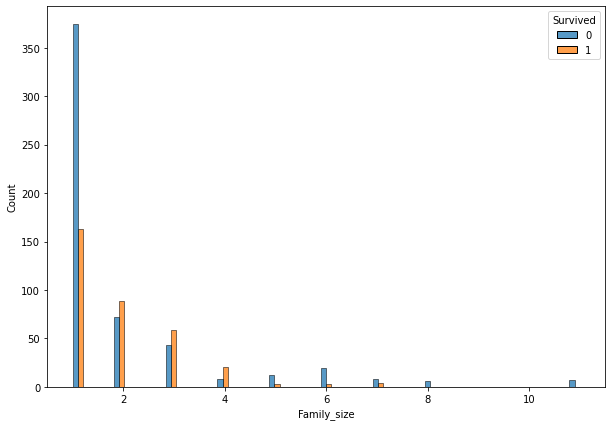

In [157]:
plt.figure(figsize=[10, 7])
sns.histplot(data=test, x=test['Family_size'], hue=test['Survived'], multiple='dodge')

In [161]:
test.groupby('Family_size').mean()['Survived']

Family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [165]:
test['Fam_gp'] = 0
test.loc[test['Family_size'] > 7, 'Fam_gp'] = 0
test.loc[(test['Family_size'] > 4)  & (test['Family_size'] < 8), 'Fam_gp'] = 1
test.loc[(test['Family_size'] > 1)  & (test['Family_size'] < 5), 'Fam_gp'] = 3
test.loc[test['Family_size'] == 1, 'Fam_gp'] = 2

<AxesSubplot:xlabel='Fam_gp', ylabel='Count'>

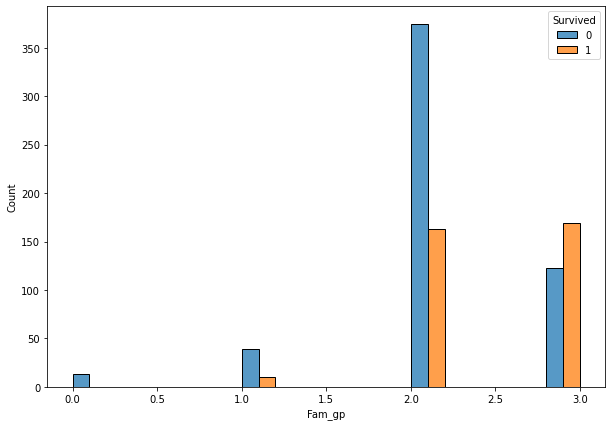

In [166]:
plt.figure(figsize=[10, 7])
sns.histplot(data=test, x=test['Fam_gp'], hue=test['Survived'], multiple='dodge')

In [167]:
df['Fam_gp'] = 0
df.loc[df['Family_size'] > 7, 'Fam_gp'] = 0
df.loc[(df['Family_size'] > 4)  & (df['Family_size'] < 8), 'Fam_gp'] = 1
df.loc[(df['Family_size'] > 1)  & (df['Family_size'] < 5), 'Fam_gp'] = 3
df.loc[df['Family_size'] == 1, 'Fam_gp'] = 2